In [1]:
import numpy as np 
import pandas as pd

from maze import Maze
from position import Position
import search as Search
import search_fire as SearchFire
import matplotlib.pyplot as plt


# Fire maze

The maze's northeast corner is on fire. The fire spreads to an empty cell according to how many of the empty cell's neighbors are on fire.  


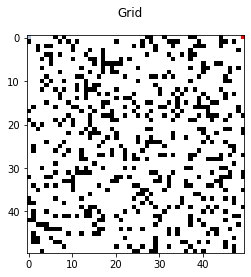

In [2]:
maze, initial_state, goal_state = Search.quick_setup(50, 0.2, 0.4)
f = maze.draw_grid()

### Trivial case - A* with manhattan distance 

A solution path for this maze is found using A* with manhattan distance.  

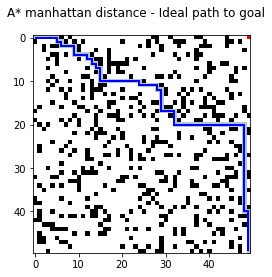

In [3]:
success, path, metrics = Search.A_star_man(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "A* manhattan distance - Ideal path to goal")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      

A mazerunner then runs along this path while the maze's fire grows.  During one timestep, the mazerunner will move one position and the fire will spread once.  

The below cell will: 
    + Print maze grid inline with path 
    + Save a video of the run 

The mazerunner did not survive using the trivial solution.


/home/rshn/Development/cs520/asst1/search_fire.py:630: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


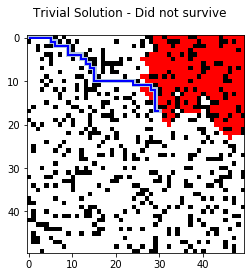

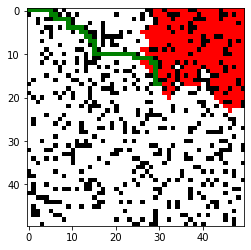

In [4]:
if success: 
    survived, state_path = SearchFire.simulate_path_and_fire(maze, path)
    final_maze = state_path[-1].maze
    final_path = state_path[-1].position_path


    if survived: 
        print("The mazerunner survived using the trivial solution.")
        f = final_maze.draw_path(final_path, 'Trivial Solution - Did survive -  A* using manhattan distance')

        # Animate the path to a .mp4 file 
        vid = SearchFire.animate(state_path, 'Trivial solution - A* using manhattan distance')
    else: 
        print("The mazerunner did not survive using the trivial solution.")
        f = final_maze.draw_path(final_path, "Trivial Solution - Did not survive")
        # Animate the path to a .mp4 file 
        vid = SearchFire.animate(state_path, 'Trivial solution - A* using manhattan distance')

        
        
    plt.show(f)
else: 
    print("There exists no path to the goal.  See previous cell")

### Trivial case (A* with euclidean distance) 
A solution path for this maze is found using A* with manhattan distance.  

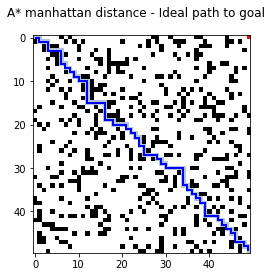

In [5]:
success, path, metrics = Search.A_star_euc(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "A* manhattan distance - Ideal path to goal")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      

Again, a mazerunner then runs along this path while the maze's fire grows.  During one timestep, the mazerunner will move one position and the fire will spread once.  

The below cell will: 
    + Print maze grid inline with path 
    + Save a video of the run 

The mazerunner survived using the trivial solution.


/home/rshn/Development/cs520/asst1/search_fire.py:630: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


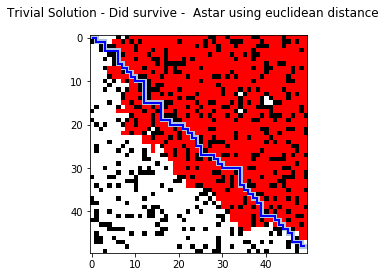

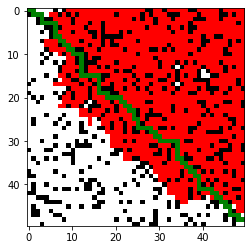

In [6]:
if success: 
    survived, state_path = SearchFire.simulate_path_and_fire(maze, path)
    final_maze = state_path[-1].maze
    final_path = state_path[-1].position_path


    if survived: 
        print("The mazerunner survived using the trivial solution.")
        f = final_maze.draw_path(final_path, 'Trivial Solution - Did survive -  Astar using euclidean distance')

        # Animate the path to a .mp4 file 
        vid = SearchFire.animate(state_path, 'Trivial solution - Astar using euclidean distance')
    else: 
        print("The mazerunner did not survive using the trivial solution.")
        f = final_maze.draw_path(final_path, "Trivial Solution - Did not survive")
        # Animate the path to a .mp4 file 
        vid = SearchFire.animate(state_path, 'Trivial solution - Astar using euclidean distance')

        
        
    plt.show(f)
else: 
    print("There exists no path to the goal.  See previous cell")

### Fire heuristic 

Consider a state to be {position, maze_state}.  We will store the maze state (how much the fire had spread) within the state.  This way, we can estimate a heuristic at each position with respect to the maze's fire spread.  

The heuristic function used is: 
```
hNode = distance_to_goal(position) - coef* distance_to_nearest_fire(position)
```

The mazerunner survived using the A* with fire heuristic.


/home/rshn/Development/cs520/asst1/search_fire.py:630: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


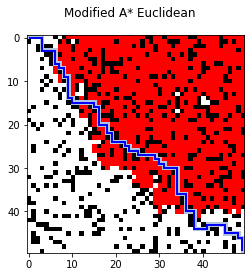

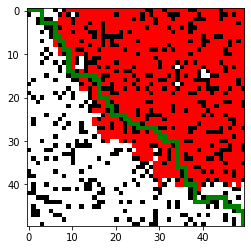

In [10]:
initial_state_fire, goal_state_fire = SearchFire.state_setup(maze)


f = 25

success, state_path, metrics = SearchFire.A_star_fire(maze, initial_state_fire, goal_state_fire, 
                                                      heuristic_function_coef=f)


final_position_path = state_path[-1].position_path
final_maze = state_path[-1].maze

if success: 
    print("The mazerunner survived using the A* with fire heuristic.")
    fig = final_maze.draw_path(final_position_path, "Modified A* Euclidean")
        
    # Animate the path to a .mp4 file 
    vid = SearchFire.animate(state_path, 'Fire maze - A* using fire heuristic, f=' + str(f))

else:
    print("The mazerunner did not survive using the A* with fire heuristic.")
    fig = final_maze.draw_path(final_position_path, "Fire maze - Did not survive, f=" + str(f))
    # Animate the path to a .mp4 file 
    vid = SearchFire.animate(state_path, 'Fire heuristic - A* using fire distance')


plt.show(fig)      


In [8]:
metrics

path length:		99
total nodes expanded:	1388
max fringe size:	61

The mazerunner survived using the A* with fire heuristic.


/home/rshn/Development/cs520/asst1/search_fire.py:630: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


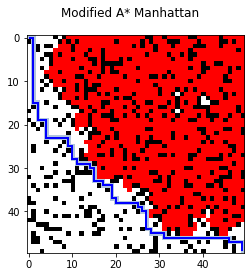

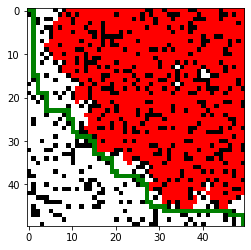

In [9]:
initial_state_fire, goal_state_fire = SearchFire.state_setup(maze)


f = 25

success, state_path, metrics = SearchFire.A_star_fire(maze, initial_state_fire, goal_state_fire, 
                                                      heuristic_function=SearchFire.fire_heuristic_3,
                                                      heuristic_function_coef=f)


final_position_path = state_path[-1].position_path
final_maze = state_path[-1].maze

if success: 
    print("The mazerunner survived using the A* with fire heuristic.")
    fig = final_maze.draw_path(final_position_path, "Modified A* Manhattan")
        
    # Animate the path to a .mp4 file 
    vid = SearchFire.animate(state_path, 'Fire maze - A* using fire heuristic, f=' + str(f))

else:
    print("The mazerunner did not survive using the A* with fire heuristic.")
    fig = final_maze.draw_path(final_position_path, "Fire maze - Did not survive, f=" + str(f))
    # Animate the path to a .mp4 file 
    vid = SearchFire.animate(state_path, 'Fire heuristic - A* using fire distance')


plt.show(fig)      


#### 